In [266]:
from numpy import *
from numpy import linalg as la
from scipy import linalg as sa
from scipy import special as ss
from scipy.special import factorial

import matplotlib.pyplot as plt

In [163]:
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
nPhot = array([50, 500, 1000, 5000, 10000, 100000, 500000, 1000000])[::-1]

In [ ]:
'''code for figures concerning the Hilbert-Schmidt distance between estimated and true quantum states'''
'''the y-axis should be adjusted for each figure concerning specific dimension separately'''

In [161]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

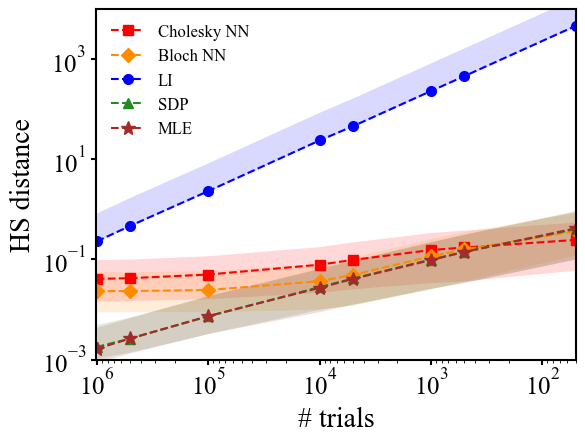

In [232]:
dim=9

choNet9HSD = loadtxt('data/HSdistsCho'+str(dim**2)+'.txt')[::-1]
stokesNet9HSD = loadtxt('data/HSdistsStokes'+str(dim**2)+'.txt')[::-1]
SDPNet9HSD=loadtxt('data/HSdistsSDP'+str(dim**2)+'.txt')[::-1]
LinInv9HSD=loadtxt('data/HSdistsLinInv'+str(dim**2)+'.txt')[::-1]
MaxLikMSE=loadtxt('data/HSdistsMaxLik'+str(dim**2)+'.txt')[::-1]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)

mks = 7.0

ax.plot(nPhot,choNet9HSD[:,0],'s--',color = 'red',markersize = mks,label='Cholesky NN')
ax.fill_between(nPhot,choNet9HSD[:,0]+choNet9HSD[:,1],choNet9HSD[:,0]-choNet9HSD[:,2],alpha=0.15,color ='red',linewidth=0.0)

ax.plot(nPhot,stokesNet9HSD[:,0],'D--',color='darkorange',markersize = mks,label='Bloch NN')
ax.fill_between(nPhot,stokesNet9HSD[:,0]+stokesNet9HSD[:,1],stokesNet9HSD[:,0]-stokesNet9HSD[:,2],alpha=0.15,color ='darkorange',linewidth=0.0)

ax.plot(nPhot,LinInv9HSD[:,0],'ob--',markersize = mks,label='LI')
ax.fill_between(nPhot,LinInv9HSD[:,0]+LinInv9HSD[:,1],LinInv9HSD[:,0]-LinInv9HSD[:,2],alpha=0.15,color ='blue',linewidth=0.0)

ax.plot(nPhot,SDPNet9HSD[:,0],'^--',color='forestgreen',markersize = mks,label='SDP')
ax.fill_between(nPhot,SDPNet9HSD[:,0]+SDPNet9HSD[:,1],SDPNet9HSD[:,0]-SDPNet9HSD[:,2],alpha=0.15,color ='forestgreen',linewidth=0.0)

ax.plot(nPhot,MaxLikMSE[:,0],'*--',color='brown',markersize = 10.0,label='MLE')
ax.fill_between(nPhot,MaxLikMSE[:,0]+MaxLikMSE[:,1],MaxLikMSE[:,0]-MaxLikMSE[:,2],alpha=0.15,color ='brown',linewidth=0.0)

plt.yscale('log')
plt.xscale('log')
plt.xlim([50,10**6+7**5][::-1])
plt.ylim([1*10**(-3),10**4])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel('HS distance',fontsize=20)
plt.xlabel('# trials',fontsize=20)
plt.legend(loc='upper left', prop={'size': 12},frameon=False, fancybox = False)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)  # change width
    
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)

plt.show()

In [268]:
'''average time to get a estimated quantum states from various approaches'''

choNet49time = mean(loadtxt('data/timeCho49.txt'))
stokesNet49time = mean(loadtxt('data/timeStokes49.txt'))
choNet9time = mean(loadtxt('data/timeCho9.txt'))
stokesNet9time = mean(loadtxt('data/timeStokes9.txt'))
choNet25time = mean(loadtxt('data/timeCho25.txt'))
stokesNet25time = mean(loadtxt('data/timeStokes25.txt'))
choNet81time = mean(loadtxt('data/timeCho81.txt'))
stokesNet81time = mean(loadtxt('data/timeStokes81.txt'))

SDP9time = mean(loadtxt('data/timeSDP9.txt'))
SDP25time = mean(loadtxt('data/timeSDP25.txt'))
SDP49time = mean(loadtxt('data/timeSDP49.txt'))
SDP81time = mean(loadtxt('data/timeSDP81.txt'))

LinInv9time = mean(loadtxt('data/timeLinInv9.txt'))
LinInv25time = mean(loadtxt('data/timeLinInv25.txt'))
LinInv49time = mean(loadtxt('data/timeLinInv49.txt'))
LinInv81time = mean(loadtxt('data/timeLinInv81.txt'))

ML9time = mean(loadtxt('data/timeMaxLik9.txt'))
ML25time = mean(loadtxt('data/timeMaxLik49.txt'))
ML49time = mean(loadtxt('data/timeMaxLik25.txt'))
ML81time = mean(loadtxt('data/timeMaxLik81.txt'))

ChoNT = [choNet9time, choNet25time, choNet49time, choNet81time]
StokesNT = [stokesNet9time, stokesNet25time, stokesNet49time, stokesNet81time]
SDPNT = [SDP9time, SDP25time, SDP49time, SDP81time]
LinInvNT = [LinInv9time, LinInv25time, LinInv49time, LinInv81time]
MLNT = [ML9time, ML25time, ML49time, ML81time]

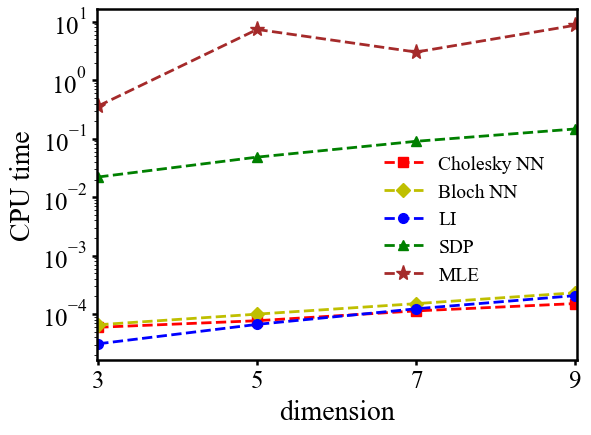

In [246]:
dims = [3,5,7,9]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)

mks = 7.0

ax.plot(dims,ChoNT,'sr--',markersize = mks,linewidth=2.0,label='Cholesky NN')
ax.plot(dims,StokesNT,'Dy--',markersize = mks,linewidth=2.0,label='Bloch NN')
ax.plot(dims,LinInvNT,'ob--',markersize = mks,linewidth=2.0,label='LI')
ax.plot(dims,SDPNT,'^g--',markersize = mks,linewidth=2.0,label='SDP')
ax.plot(dims,MLNT,'*--',markersize = 11.0,linewidth=2.0,color='brown',label='MLE')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel('CPU time',fontsize=20)
plt.xlabel('dimension',fontsize=20)
plt.xticks(dims)
plt.xlim([2.98,9.02])
plt.legend(loc=0 ,bbox_to_anchor=(0.97, 0.4), prop={'size': 14},frameon=False, fancybox = False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.8) 
    
ax.xaxis.set_tick_params(width=1.8)
ax.yaxis.set_tick_params(width=1.8)
plt.show()

In [22]:
minE3 = loadtxt('data/minE3.txt')[::-1]
minE5 = loadtxt('data/minE5.txt')[::-1]
minE7 = loadtxt('data/minE7.txt')[::-1]
minE9 = loadtxt('data/minE9.txt')[::-1]
minS3 = loadtxt('data/minEStokes9.txt')[::-1]
minS5 = loadtxt('data/minEStokes25.txt')[::-1]
minS7 = loadtxt('data/minEStokes49.txt')[::-1]
minS9 = loadtxt('data/minEStokes81.txt')[::-1]

In [30]:
amin(minS3,axis=1)

array([-0.01249283, -0.01693055, -0.03302551, -0.06398889, -0.1851503 ,
       -0.35091946, -0.29002536, -1.20114597])

In [26]:
mE3 = sum(minE3>0,axis=1)/10000
mE5 = sum(minE5>0,axis=1)/10000
mE7 = sum(minE7>0,axis=1)/10000
mE9 = sum(minE9>0,axis=1)/10000
mS3 = sum(minS3>0,axis=1)/10000
mS5 = sum(minS5>0,axis=1)/10000
mS7 = sum(minS7>0,axis=1)/10000
mS9 = sum(minS9>0,axis=1)/10000

In [19]:
minE3[minE3>0]=0
minE5[minE5>0]=0
minE7[minE7>0]=0
minE9[minE9>0]=0
minS3[minS3>0]=0
minS5[minS5>0]=0
minS7[minS7>0]=0
minS9[minS9>0]=0

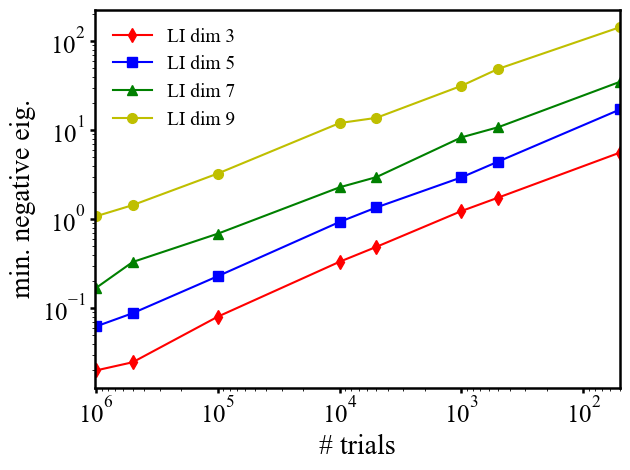

In [262]:
fig, ax1 = plt.subplots()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)
ax1.plot(nPhot,abs(amin(minE3,axis=1)),'dr-',markersize = mks,label='LI dim 3')
ax1.plot(nPhot,abs(amin(minE5,axis=1)),'sb-',markersize = mks,label='LI dim 5')
ax1.plot(nPhot,abs(amin(minE7,axis=1)),'^g-',markersize = mks,label='LI dim 7')
ax1.plot(nPhot,abs(amin(minE9,axis=1)),'oy-',markersize = mks,label='LI dim 9')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('min. negative eig.',fontsize=20)
plt.xlabel('# trials',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='upper left', prop={'size': 14},frameon=False, fancybox = False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.8)
    
ax1.xaxis.set_tick_params(width=1.8)
ax1.yaxis.set_tick_params(width=1.8)

plt.xlim([50,10**6+7**5][::-1])
fig.tight_layout() 
plt.show()

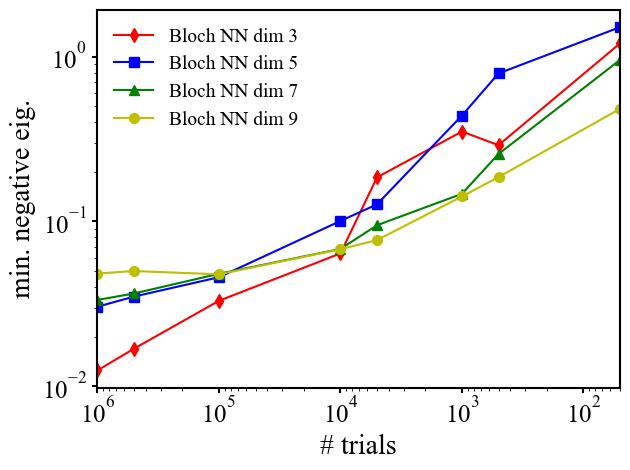

In [263]:
fig, ax1 = plt.subplots()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)
ax1.plot(nPhot,abs(amin(minS3,axis=1)),'dr-',markersize = mks,label='Bloch NN dim 3')
ax1.plot(nPhot,abs(amin(minS5,axis=1)),'sb-',markersize = mks,label='Bloch NN dim 5')
ax1.plot(nPhot,abs(amin(minS7,axis=1)),'^g-',markersize = mks,label='Bloch NN dim 7')
ax1.plot(nPhot,abs(amin(minS9,axis=1)),'oy-',markersize = mks,label='Bloch NN dim 9')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('min. negative eig.',fontsize=20)
plt.xlabel('# trials',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='upper left', prop={'size': 14},frameon=False, fancybox = False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5) 
    
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

plt.xlim([50,10**6+7**5][::-1])
fig.tight_layout() 
plt.show()

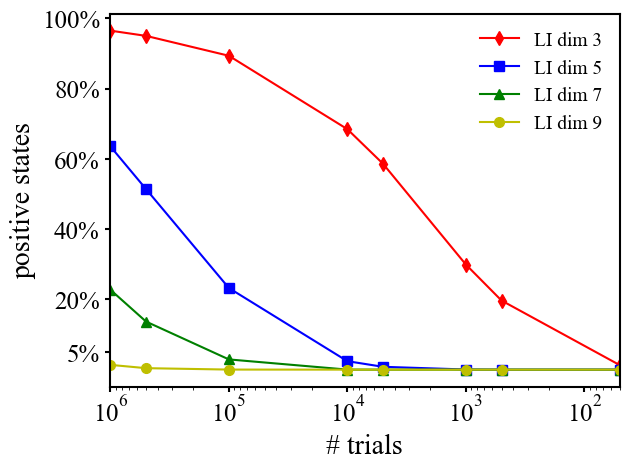

In [252]:
fig, ax1 = plt.subplots()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)

ax1.plot(nPhot,mE3,'dr-',markersize = mks,label='LI dim 3')
ax1.plot(nPhot,mE5,'sb-',markersize = mks,label='LI dim 5')
ax1.plot(nPhot,mE7,'^g-',markersize = mks,label='LI dim 7')
ax1.plot(nPhot,mE9,'oy-',markersize = mks,label='LI dim 9')
# plt.yscale('log')
plt.xscale('log')
plt.yticks([1,0.8,0.6,0.4,0.2,0.05],['100%','80%','60%','40%','20%','5%'])
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(loc='upper right', prop={'size': 14},frameon=False, fancybox = False)
plt.ylabel('positive states',fontsize=20)
plt.xlabel('# trials',fontsize=20)
plt.xlim([50,10**6+7**5][::-1])
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

fig.tight_layout()
plt.show()

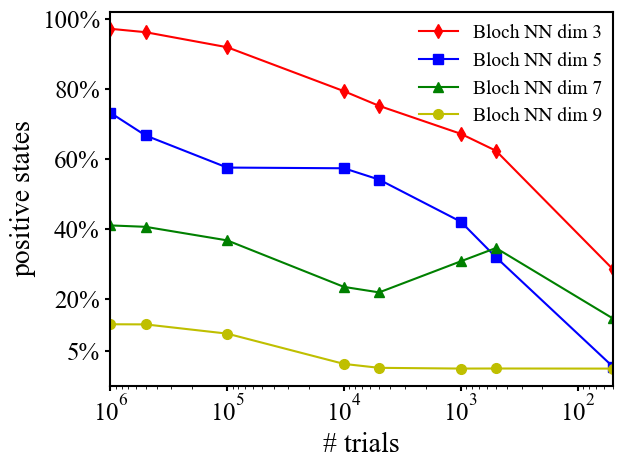

In [260]:
fig, ax1 = plt.subplots()
plt.subplots_adjust(bottom=0.15)
plt.subplots_adjust(left=0.15)

ax1.plot(nPhot,mS3,'dr-',markersize = mks,label='Bloch NN dim 3')
ax1.plot(nPhot,mS5,'sb-',markersize = mks,label='Bloch NN dim 5')
ax1.plot(nPhot,mS7,'^g-',markersize = mks,label='Bloch NN dim 7')
ax1.plot(nPhot,mS9,'oy-',markersize = mks,label='Bloch NN dim 9')
# plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.yticks([1,0.8,0.6,0.4,0.2,0.05],['100%','80%','60%','40%','20%','5%'])
plt.ylabel('positive states',fontsize=20)
plt.xlabel('# trials',fontsize=20)
plt.xlim([50,10**6+7**5][::-1])
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

plt.legend(loc=0 ,bbox_to_anchor=(0.58, 0.65), prop={'size': 14},frameon=False, fancybox = False)

fig.tight_layout()
plt.show()